Notebook elaborado a partir do artigo disponível em https://flothesof.github.io/FFT-window-properties-frequency-analysis.html

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set() # styling
from scipy.signal import get_window
import pandas as pd

In [ ]:
m = 513
t = np.arange(m) #array com 513 pontos entre 0 e 512

In [ ]:
w = get_window('hamming', m) #janela de hamming

(-0.025, 1.025)

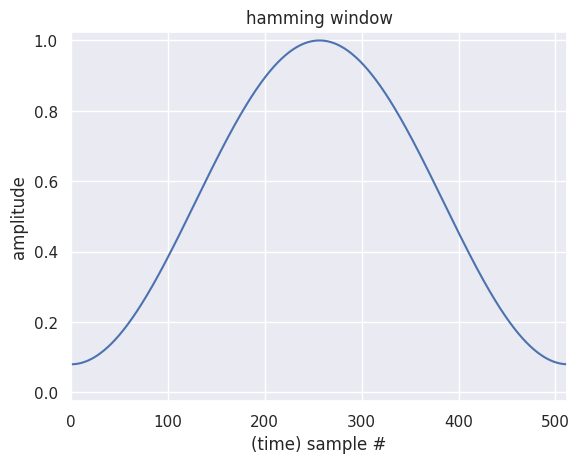

In [ ]:
plt.plot(t, w)
plt.xlabel("(time) sample #")
plt.ylabel("amplitude")
plt.title("hamming window")
plt.xlim(0, m-1)
plt.ylim(-0.025, 1.025)

Fazendo a fft real da janela de hamming

In [ ]:
w_fft = np.fft.rfft(w)

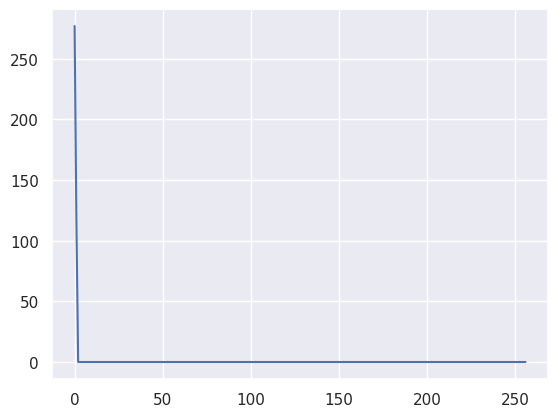

In [ ]:
freqs = np.fft.rfftfreq(w.size, d=1/m)
plt.plot(freqs, np.abs(w_fft))

(0.0, 20.0)

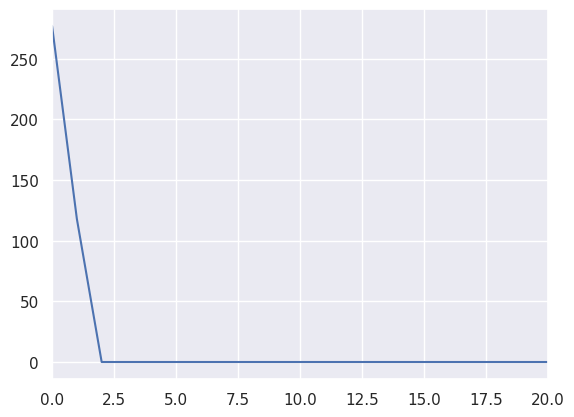

In [ ]:
plt.plot(freqs, np.abs(w_fft))
plt.xlim(0, 20)

Interpolando o sinal para obter um sinal mais detalhado e suave

(0.0, 20.0)

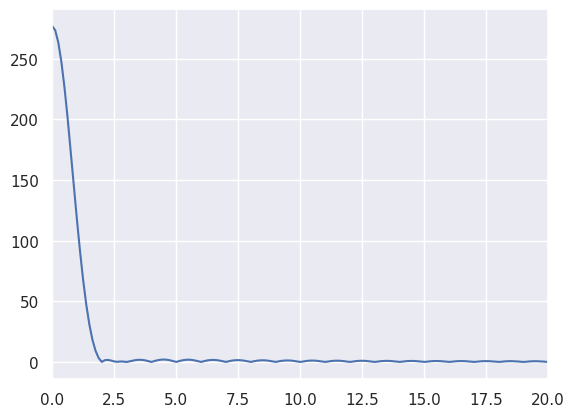

In [ ]:
n = 4096
w_fft = np.fft.rfft(w, n=4096)
freqs = np.fft.rfftfreq(n, d=1/m)
plt.plot(freqs, np.abs(w_fft))
plt.xlim(0, 20)

Representando o gráfico acima em decibel

(0.0, 20.0)

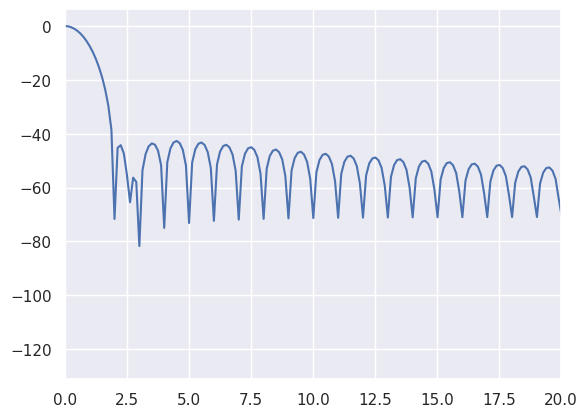

In [ ]:
plt.plot(freqs, 20*np.log10(np.abs(w_fft) / np.abs(w_fft).max()))
plt.xlim(0, 20)

In [ ]:
def compute_mainlobe_width(spectrum):
    """
    computes mainlobe width from spectrum

    assumes the mainlobe starts at 0, that spectrum size is odd, and that
    the spectrum is real-valued (half of the frequencies)

    returns the number of samples of full mainlobe (not just half)
    """
    abs_spectrum = np.abs(spectrum)
    current_value = abs_spectrum[0]
    for ind, next_value in enumerate(abs_spectrum):
        if next_value > current_value:
            break
        else:
            current_value = next_value
    return 2 * ind - 1

In [ ]:
compute_mainlobe_width(w_fft)

33

In [ ]:
np.abs(w_fft)[:17]

array([2.77020000e+02, 2.73591595e+02, 2.63517875e+02, 2.47415076e+02,
       2.26251299e+02, 2.01264417e+02, 1.73859070e+02, 1.45493077e+02,
       1.17564375e+02, 9.13092581e+01, 6.77210939e+01, 4.74962428e+01,
       3.10107310e+01, 1.83278539e+01, 9.23361807e+00, 3.29417539e+00,
       7.25469261e-02])

In [ ]:
np.abs(w_fft)[17]

1.5197779996003906

In [ ]:
def compute_sidelobe_level(spectrum):
    """
    computes sidelobe level from spectrum

    assumes the mainlobe starts at 0, that spectrum size is odd, and that
    the spectrum is real-valued (half of the frequencies)

    returns the level of sidelobes in dB
    """
    mainlobe_width = compute_mainlobe_width(spectrum)

    ind = int((mainlobe_width - 1) / 2)

    abs_spectrum = np.abs(spectrum)

    return 20 * np.log10(abs_spectrum[ind:].max() / abs_spectrum.max())

In [ ]:
compute_sidelobe_level(w_fft)

-42.6768148367648

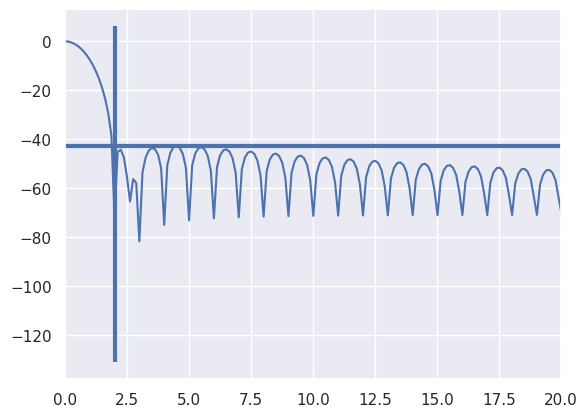

In [ ]:
plt.plot(freqs, 20*np.log10(np.abs(w_fft) / np.abs(w_fft).max()))
plt.xlim(0, 20)
width = compute_mainlobe_width(w_fft)
level = compute_sidelobe_level(w_fft)

ylim_range = plt.ylim()
plt.vlines((width - 1) / 2 * m / n, ylim_range[0], ylim_range[1], lw=3)
xlim_range = plt.xlim()
plt.hlines(level, xlim_range[0], xlim_range[1], lw=3)

**Propriedades das principais funções de janelamento**

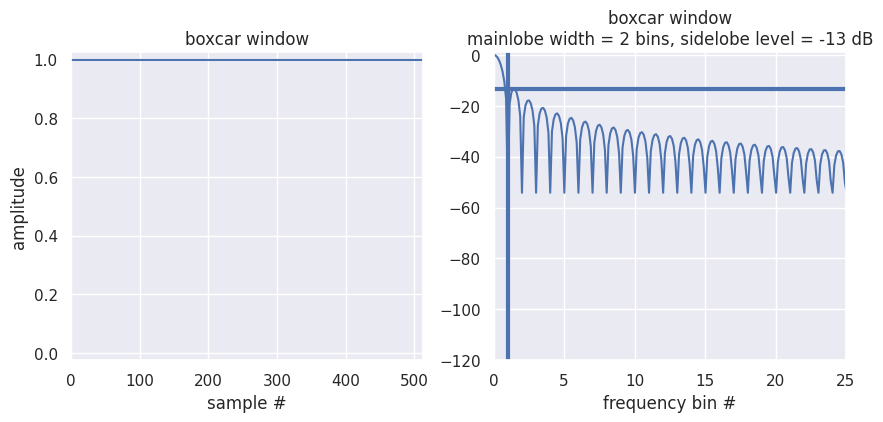

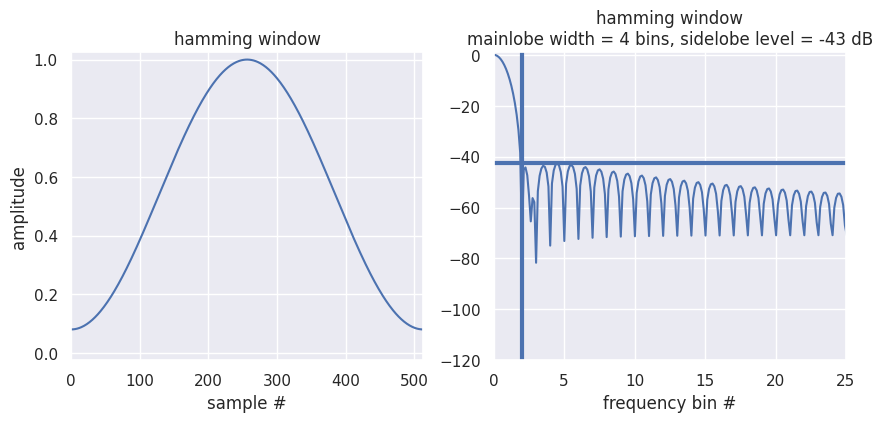

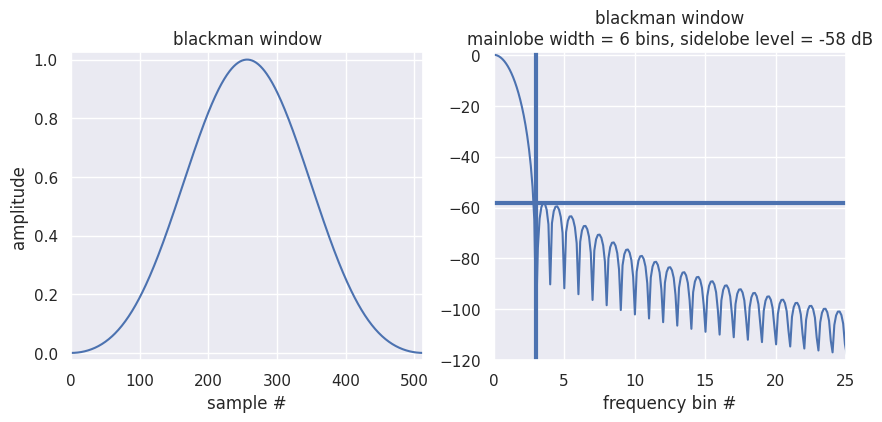

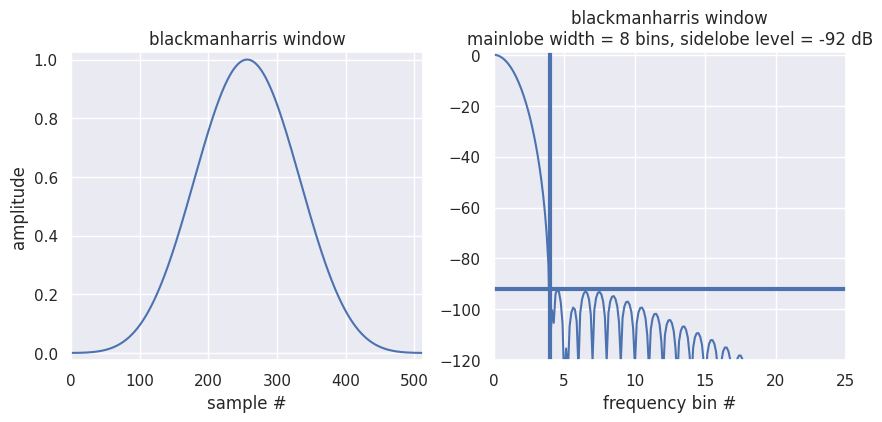

In [ ]:
for window in ['boxcar',  'hamming', 'blackman', 'blackmanharris']:
    m = 513
    w = get_window(window, m)
    n = 4096
    w_fft = np.fft.rfft(w, n)
    freqs = np.fft.rfftfreq(n, d=1/m)
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    plt.plot(t, w)
    plt.xlabel("sample #")
    plt.ylabel("amplitude")
    plt.title("{} window".format(window))
    plt.xlim(0, t.size)
    plt.ylim(-0.025, 1.025)
    plt.subplot(122)
    plt.plot(freqs, 20*np.log10(np.abs(w_fft) / np.abs(w_fft).max()))
    plt.xlim(0, 25)
    plt.ylim(-120, 1)
    width = compute_mainlobe_width(w_fft)
    width_bins = width * m / n
    level = compute_sidelobe_level(w_fft)
    ylim_range = plt.ylim()
    plt.vlines((width - 1) / 2 * m / n, ylim_range[0], ylim_range[1], lw=3)
    xlim_range = plt.xlim()
    plt.hlines(level, xlim_range[0], xlim_range[1], lw=3)
    plt.title("{} window\nmainlobe width = {:.0f} bins, sidelobe level = {:.0f} dB".format(window,
                                                                       width_bins,
                                                                       level))
    plt.xlabel('frequency bin #')

In [ ]:
props = {}
for window in ['boxcar', 'hann', 'hamming', 'blackman', 'blackmanharris']:
    m = 513
    w = get_window(window, m)
    n = 4096
    w_fft = np.fft.rfft(w, n)
    freqs = np.fft.rfftfreq(n, d=1/m)
    width = compute_mainlobe_width(w_fft)
    width_bins = width * m / n
    level = compute_sidelobe_level(w_fft)
    props[window] = {'mainlobe width (bins)': width_bins,
                    'sidelobe level (dB)': level}
df = pd.DataFrame(props).transpose()
df

,mainlobe width (bins),sidelobe level (dB)
boxcar,2.129150,-13.383597
hann,4.133057,-31.482269
hamming,4.133057,-42.676815
blackman,6.136963,-58.202942
blackmanharris,8.140869,-92.014585


# **Exemplo analisando uma senoide**

Text(0.5, 1.0, 'sinusoid, 1000 samples, sampling rate 500.0 Hz')

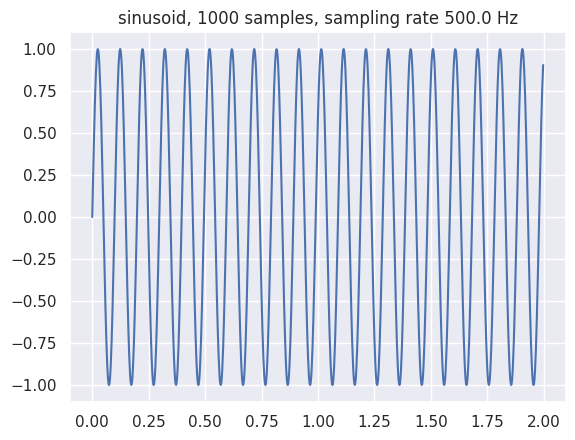

In [ ]:
t = np.arange(0, 2, step=1/500)
m = t.size
s = np.sin(2 * np.pi * 10.1 * t)
plt.plot(t, s)
plt.title("sinusoid, {} samples, sampling rate {} Hz".format(m, 1/(t[1] - t[0])))

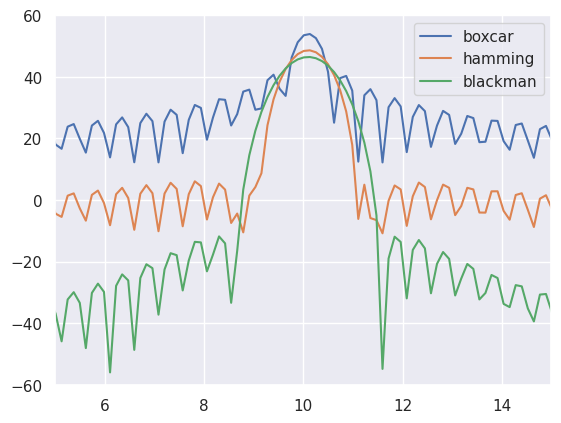

In [ ]:
for window in ['boxcar', 'hamming', 'blackman']:
    n = 4096
    w = np.fft.rfft(s * get_window(window, m), n=n)
    freqs = np.fft.rfftfreq(n, d=t[1] - t[0])
    plt.plot(freqs, 20*np.log10(np.abs(w)), label=window)
plt.ylim(-60, 60)
plt.xlim(5, 15)
plt.legend()

## Duas senoides com frequências próximas

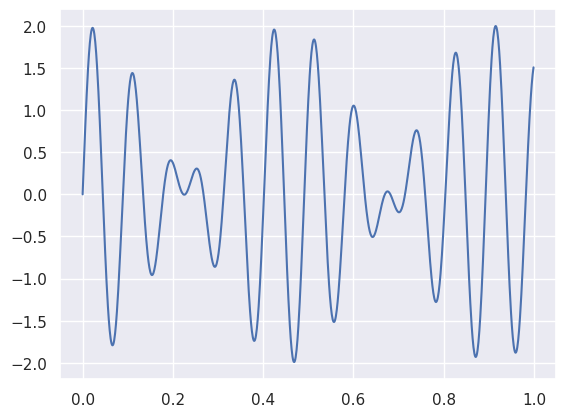

In [ ]:
t = np.arange(0, 1, step=1/1000.)
m = t.size
s = np.sin(2 * np.pi * 10.1 * t) + np.sin(2 * np.pi * 12.3 * t)
plt.plot(t, s)

(0.0, 20.0)

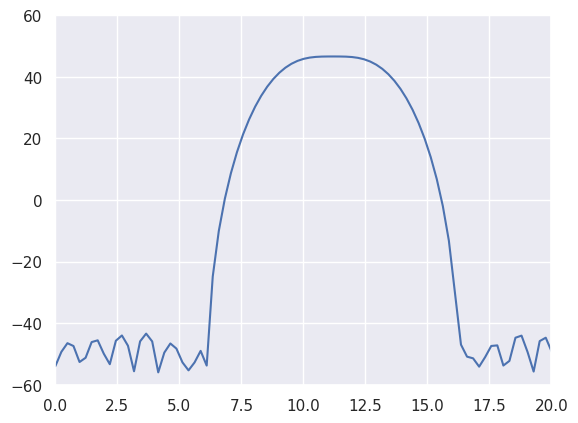

In [ ]:
n = 4096
w = np.fft.rfft(s * get_window('blackmanharris', m), n=n)
freqs = np.fft.rfftfreq(n, d=t[1] - t[0])
plt.plot(freqs, 20*np.log10(np.abs(w)))
plt.ylim(-60, 60)
plt.xlim(0, 20)

(0.0, 20.0)

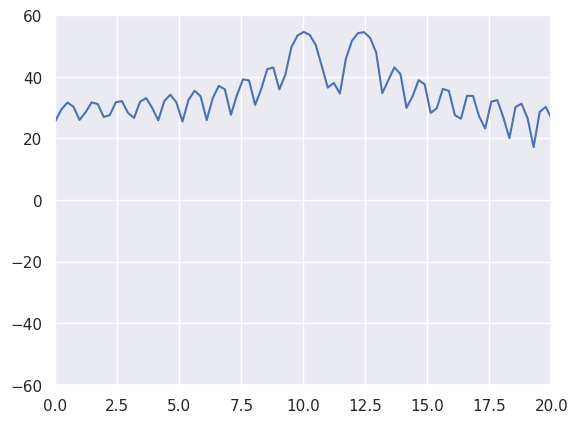

In [ ]:
w = np.fft.rfft(s * get_window('boxcar', m), n=n)
freqs = np.fft.rfftfreq(n, d=t[1] - t[0])
plt.plot(freqs, 20*np.log10(np.abs(w)))
plt.ylim(-60, 60)
plt.xlim(0, 20)

## **Duas senoides com amplitudes diferentes.**

https://flothesof.github.io/FFT-window-properties-frequency-analysis.html

https://download.ni.com/evaluation/pxi/Understanding%20FFTs%20and%20Windowing.pdf

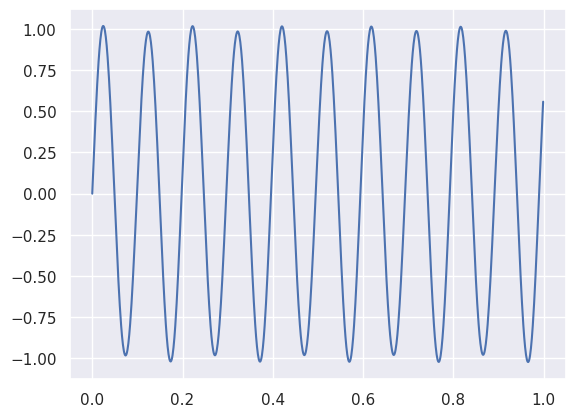

In [ ]:
t = np.arange(0, 1, step=1/1000.)
s = np.sin(2 * np.pi * 10.1 * t) + 0.025 * np.sin(2 * np.pi * 15.2 * t)
plt.plot(t, s)

(0.0, 20.0)

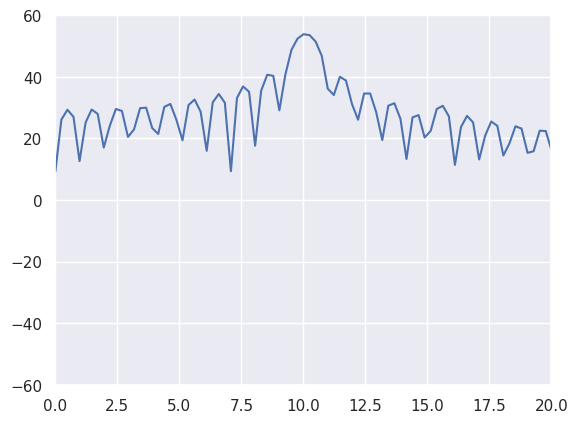

In [ ]:
n = 4096
w = np.fft.rfft(s * get_window('boxcar', m), n=n)
freqs = np.fft.rfftfreq(n, d=t[1] - t[0])
plt.plot(freqs, 20*np.log10(np.abs(w)))
plt.ylim(-60, 60)
plt.xlim(0, 20)

(0.0, 20.0)

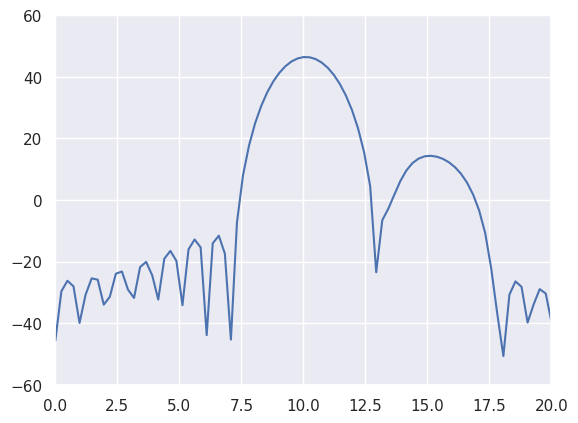

In [ ]:
n = 4096
w = np.fft.rfft(s * get_window('blackman', m), n=n)
freqs = np.fft.rfftfreq(n, d=t[1] - t[0])
plt.plot(freqs, 20*np.log10(np.abs(w)))
plt.ylim(-60, 60)
plt.xlim(0, 20)